In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Read data

In [2]:
df = pd.read_csv("../data/atm_pressure.csv")
df


,Atm,Temperature
0,20.79,194.5
1,20.79,194.3
2,22.40,197.9
3,22.67,198.4
4,23.15,199.4
5,23.35,199.9
6,23.89,200.9
7,23.99,201.1
8,24.02,201.4
9,24.01,201.3


In [3]:
temps = np.array(df["Temperature"])
atms = np.array(df["Atm"])
temps.shape

(17,)

## Plot 

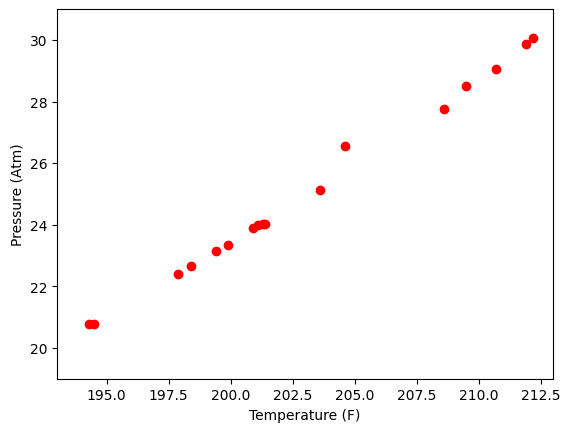

In [4]:
plt.scatter(temps, atms, color="red", marker="o", )
plt.axis([193, 213, 19, 31])
plt.xlabel("Temperature (F)")
plt.ylabel("Pressure (Atm)")

plt.show()

## Method 1

- y = w0 + w1 * x <br/>
=> (atm = w0 + w1 * temp)
- Calculate the cofficients w0, w1. 



- deviation of X: X - mean(X) 
- deviation of Y: Y - mean(Y)

- w1 = Cov(X, Y) / var(X)

![Alt text](image.png)
- y_h = w0 + w1 * x_h <br/>
=> w0 = y_h - w1 * x_h

- calculate means

In [5]:
x_h = np.mean(temps)
y_h = np.mean(atms)
print(y_h)

25.058823529411764


- calculate covarian
- np.cov(x, y) will return: <br/>
cov(x,x) cov(x,y) <br/>
cov(y,x) cov(y,y)


In [6]:
cov = np.cov(temps, atms)
cov = cov[0, 1]
var = np.var(temps)
cov

17.34637867647057

- calculate w0, w1

In [7]:
w1 = cov/ var
w0 = y_h - w1 * x_h

- plot both datas

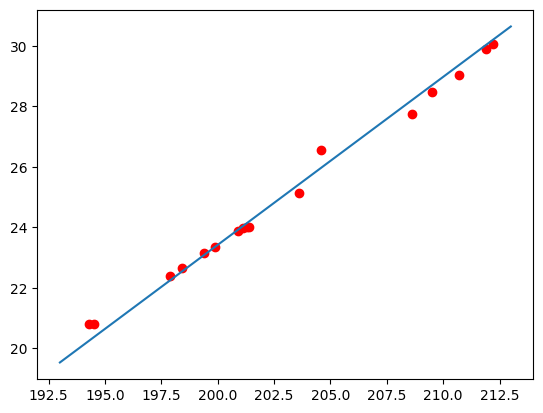

In [8]:
x_h = np.linspace(193, 213, 2)
y_h = w0 + w1 * x_h

plt.plot(x_h, y_h)
plt.scatter(temps, atms, color="red", marker="o")

## Method 2
- Use invert matrix multiplication

![Alt text](image-2.png)

- Convert Xs and Ys to 2-D

In [9]:
temps = np.array([df["Temperature"]])
atms = np.array([df["Atm"]])
atms


array([[20.79, 20.79, 22.4 , 22.67, 23.15, 23.35, 23.89, 23.99, 24.02,
        24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06]])

- Create matrix filled with 1s

In [10]:
one_matrix = np.ones((1, temps.shape[1]), dtype=np.uint8)
one_matrix

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

- Concatenate it with the Xs matrix and transpose it

In [11]:
Xbar = np.row_stack((one_matrix, temps)).T
Xbar


array([[  1. , 194.5],
       [  1. , 194.3],
       [  1. , 197.9],
       [  1. , 198.4],
       [  1. , 199.4],
       [  1. , 199.9],
       [  1. , 200.9],
       [  1. , 201.1],
       [  1. , 201.4],
       [  1. , 201.3],
       [  1. , 203.6],
       [  1. , 204.6],
       [  1. , 209.5],
       [  1. , 208.6],
       [  1. , 210.7],
       [  1. , 211.9],
       [  1. , 212.2]])

- Some weird things

![Alt text](image-1.png)

In [12]:
A = Xbar.T @ Xbar
b = Xbar.T @ atms.T
print(A)
print(b)

[[1.7000000e+01 3.4502000e+03]
 [3.4502000e+03 7.0075902e+05]]
[[  426.   ]
 [86735.495]]


- get inverted matrix of A

In [13]:
inverted_A = np.linalg.pinv(A)
w = (inverted_A @ b).T
w0 = w[0][0]
w1 = w[0][1]

- plot

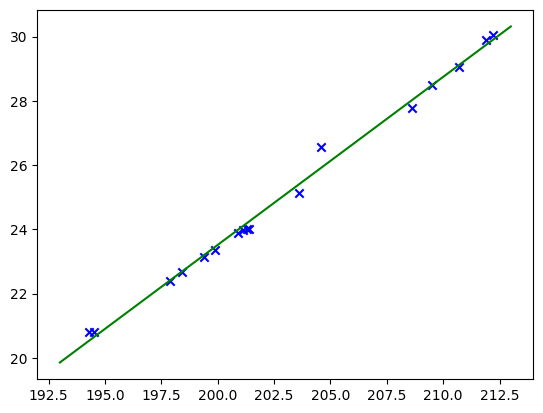

In [14]:
x_h = np.linspace(193,213, 2)
y_h = w0 + w1* x_h

plt.scatter(temps, atms, color="blue", marker="x")
plt.plot(x_h, y_h, color="green")